In [2]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


In [3]:
from src.models import perform_clustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.preprocessing import preprocess_data

c:\Users\Lenovo\anaconda3\envs\churn_env\python312.zip
c:\Users\Lenovo\anaconda3\envs\churn_env\DLLs
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib
c:\Users\Lenovo\anaconda3\envs\churn_env

c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\win32
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\win32\lib
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\Pythonwin
c:\Users\Lenovo\Customer-Churn-Prediction-Segmentation


In [5]:
# Load and preprocess data
df = pd.read_csv('../../data/customer_data.csv')
X, y, X_scaled = preprocess_data(df)

In [6]:
# Perform clustering
clustered_df = perform_clustering(X_scaled, n_clusters=4)

In [7]:
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

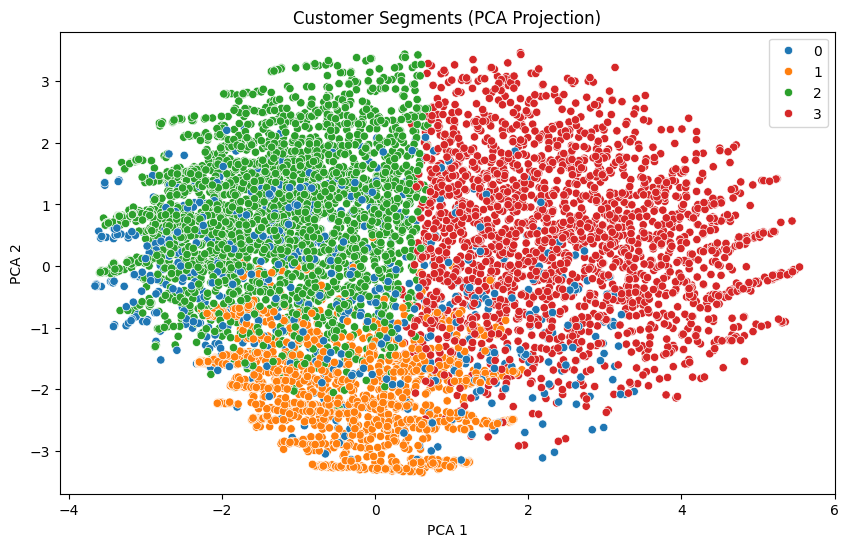

In [9]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clustered_df['cluster'], palette='tab10')
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()